# Pulling Results into a Notebook

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import wandb

2023-02-14 16:37:34.292168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Create the API instance

In [2]:
api = wandb.Api()

## Search Through Runs

In [3]:
runs = api.runs("dwl2x/mnist_vit")

In [4]:
for run in runs:
    print(run.id, run.name)

vvwnjy92 sage-wildflower-7
h94s42l1 driven-smoke-6


## Pull a specific run

In [5]:
# run = runs[0]
run = api.run("dwl2x/mnist_vit/vvwnjy92")

## Pull General History

In [6]:
# Limits to 500 sample points. Use scan_history for all data
history = run.history()
history

,_step,sparse_categorical_accuracy,loss,_runtime,val_sparse_categorical_accuracy,epoch,_timestamp,val_loss
0,0,0.670017,1.009569,287.669273,0.8125,0,1.676299e+09,0.578291
1,1,0.839500,0.503648,303.569930,0.8743,1,1.676299e+09,0.393698
2,2,0.888117,0.359108,319.390640,0.9076,2,1.676300e+09,0.297150
3,3,0.911617,0.282952,335.284207,0.9213,3,1.676300e+09,0.252255
4,4,0.924650,0.241555,351.027205,0.9352,4,1.676300e+09,0.206867
5,5,0.933567,0.212516,366.706097,0.9444,5,1.676300e+09,0.182086
6,6,0.940450,0.190078,382.599570,0.9476,6,1.676300e+09,0.172809
7,7,0.946083,0.174214,398.542535,0.9521,7,1.676300e+09,0.153698
8,8,0.948933,0.161397,414.614483,0.9543,8,1.676300e+09,0.149426
9,9,0.952950,0.148631,430.492117,0.9550,9,1.676300e+09,0.139820


In [7]:
history["sparse_categorical_accuracy"]

0     0.670017
1     0.839500
2     0.888117
3     0.911617
4     0.924650
5     0.933567
6     0.940450
7     0.946083
8     0.948933
9     0.952950
10    0.956017
11    0.958567
12    0.961250
13    0.962233
14    0.964650
15    0.966517
16    0.968283
17    0.969283
18    0.970250
19    0.970667
Name: sparse_categorical_accuracy, dtype: float64

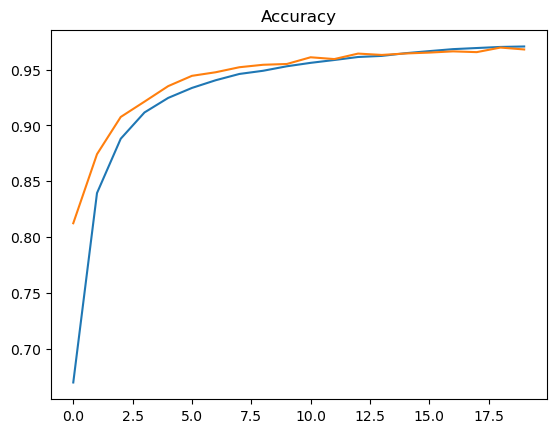

In [8]:
plt.title("Accuracy")
plt.plot(history["epoch"], history["sparse_categorical_accuracy"])
plt.plot(history["epoch"], history["val_sparse_categorical_accuracy"])
plt.show()

## Pulling Files from Run

---
## Pulling Artifacts

In [10]:
path = api.artifact("dwl2x/mnist_dcgan/mnist-generator:v0").download()
path

wandb:   4 of 4 files downloaded.  


'./artifacts/mnist-generator:v0'

In [13]:
generator = tf.keras.models.load_model(path)

In [44]:
digit = generator(np.random.normal(size=(1, generator.input_shape[1])))[0]

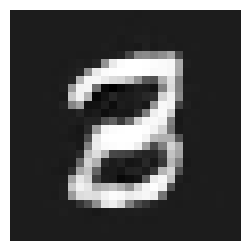

In [45]:
plt.figure(figsize=(3, 3))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.show()

In [46]:
artifact = api.artifact("dwl2x/mnist_dataset/mnist:v1")